In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
df=pd.read_csv("E:\MDTM40\Project5_AI_Echo_NLP\chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [4]:
df.describe()

,rating,helpful_votes,review_length
count,50.000000,50.000000,50.000000
mean,3.000000,60.320000,13.400000
std,1.340119,25.288894,3.505098
min,1.000000,9.000000,7.000000
25%,2.000000,39.000000,10.000000
50%,3.000000,62.000000,13.000000
75%,4.000000,85.750000,16.000000
max,5.000000,99.000000,21.000000


In [5]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [6]:
df.shape

(50, 12)

In [9]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [10]:
df.dtypes

date                 object
title                object
review               object
rating                int64
username             object
helpful_votes         int64
review_length         int64
platform             object
language             object
location             object
version              object
verified_purchase    object
dtype: object

EDA - Analysing features

In [12]:
df['rating'].value_counts()

rating
2    13
3    13
5    10
1     7
4     7
Name: count, dtype: int64

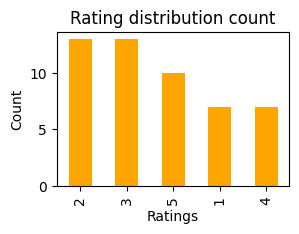

In [19]:
#Bar plot to visualize the total counts of each rating

plt.figure(figsize=(3,2))
df['rating'].value_counts().plot.bar(color = 'orange')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [20]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")


Rating value count - percentage distribution: 
rating
2    26.0
3    26.0
5    20.0
1    14.0
4    14.0
Name: count, dtype: float64


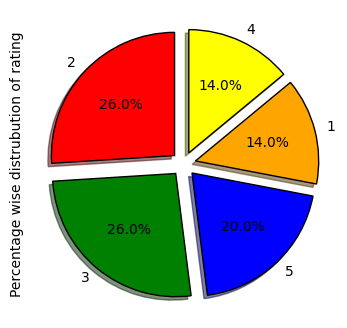

In [21]:
fig = plt.figure(figsize=(4,4))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = df['rating'].value_counts()/df.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")


In [23]:
df['verified_purchase'].value_counts()

verified_purchase
No     30
Yes    20
Name: count, dtype: int64

In [28]:
df.groupby('rating').agg({'helpful_votes': 'sum'})

,helpful_votes
rating,
1,437
2,715
3,859
4,334
5,671


In [29]:
df['platform'].value_counts()

platform
Flipkart       15
App Store      15
Amazon         11
Google Play     9
Name: count, dtype: int64

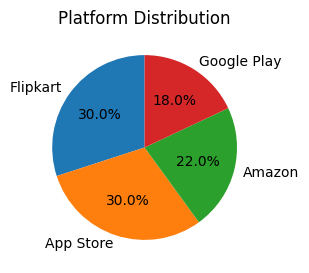

In [31]:
df['platform'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(3,3), startangle=90)
plt.title("Platform Distribution")
plt.ylabel("") 
plt.show()

In [38]:
df['location'].value_counts()

location
Denmark                                         3
Nepal                                           2
Brunei Darussalam                               2
Macao                                           2
Liechtenstein                                   2
Mexico                                          2
Isle of Man                                     2
Panama                                          1
United States Minor Outlying Islands            1
Spain                                           1
Guatemala                                       1
Hong Kong                                       1
Antigua and Barbuda                             1
Kuwait                                          1
Switzerland                                     1
South Georgia and the South Sandwich Islands    1
Seychelles                                      1
French Guiana                                   1
Cote d'Ivoire                                   1
Faroe Islands                            

In [39]:
df['language'].value_counts()

language
en    19
fr    13
es    10
de     8
Name: count, dtype: int64

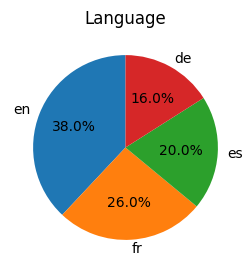

In [40]:
df['language'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(3,3), startangle=90)
plt.title("Language")
plt.ylabel("") 
plt.show()

In [ ]:
#from wordcloud import WordCloud

In [41]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
df['sentiment'].value_counts()


sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

In [42]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,sentiment
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,Negative
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,Negative
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,Positive
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,Neutral
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,Negative


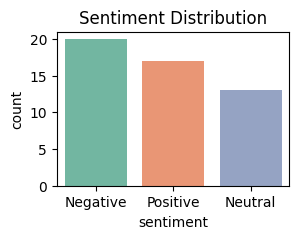

In [47]:
plt.figure(figsize=(3,2))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()

Text Processing

In [ ]:
# converting sentences to lower case letter
df['title'] = df['title'].str.lower()
df['title'].head()

0     east list local interesting far magazine father.
1    road determine picture figure hard experience ...
2                   policy social past analysis whole.
3                 news financial billion four foreign.
4                  to skill she case sing stop likely.
Name: title, dtype: object

In [51]:
# removing extra white space
def remove_whitespace(text):
  return " ".join(text.split())

df['title'] = df['title'].apply(remove_whitespace)
df['title'].head(3)

0     east list local interesting far magazine father.
1    road determine picture figure hard experience ...
2                   policy social past analysis whole.
Name: title, dtype: object

In [52]:
# Tokenization
from nltk import word_tokenize
df['title']=df['title'].apply(lambda X: word_tokenize(X))
df['title'].head(3)

0    [east, list, local, interesting, far, magazine...
1    [road, determine, picture, figure, hard, exper...
2           [policy, social, past, analysis, whole, .]
Name: title, dtype: object

In [54]:
# stopword removal
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('english'))

en_stopwords = stopwords.words('english')

def remove_stopwords(text):
   result = []
   for token in text:
       if token not in en_stopwords:
           result.append(token)
   return result

df['title'] = df['title'].apply(remove_stopwords)
df['title'].head(3)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [east, list, local, interesting, far, magazine...
1    [road, determine, picture, figure, hard, exper...
2           [policy, social, past, analysis, whole, .]
Name: title, dtype: object

In [56]:
# Removing special characters
from nltk.tokenize import RegexpTokenizer
def remove_punct(text):
   tokenizer = RegexpTokenizer(r"\w+")
   lst=tokenizer.tokenize(' '.join(text))
   return lst
df['title'] = df['title'].apply(remove_punct)
df['title'].head(3)

0    [east, list, local, interesting, far, magazine...
1    [road, determine, picture, figure, hard, exper...
2              [policy, social, past, analysis, whole]
Name: title, dtype: object

In [57]:
# Lemmetization and Stemming
import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger_eng')

def lemmatization(text):
   result=[]
   wordnet = WordNetLemmatizer()
   for token,tag in pos_tag(text):
       pos=tag[0].lower()

       if pos not in ['a', 'r', 'n', 'v']:
           pos='n'

       result.append(wordnet.lemmatize(token,pos))

   return result
df['title'] = df['title'].apply(lemmatization)
df['title'].head(3)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\shast\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


0    [east, list, local, interest, far, magazine, f...
1    [road, determine, picture, figure, hard, exper...
2              [policy, social, past, analysis, whole]
Name: title, dtype: object

In [58]:
from nltk.stem import PorterStemmer

def stemming(text):
   porter = PorterStemmer()

   result=[]
   for word in text:
       result.append(porter.stem(word))
   return result
df['title'] = df['title'].apply(stemming)
df['title'].head(3)

0    [east, list, local, interest, far, magazin, fa...
1    [road, determin, pictur, figur, hard, experi, ...
2               [polici, social, past, analysi, whole]
Name: title, dtype: object